In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = r"C:\Users\rsmvs\OneDrive\Desktop\Climate Project\IND.xlsx"  # Update with actual path
subnational_tree_cover_loss_df = pd.read_excel(file_path, sheet_name="Subnational 1 tree cover loss")

# Extract relevant columns
years = [col for col in subnational_tree_cover_loss_df.columns if "tc_loss_ha_" in col]
subnational_tree_cover_loss_df["avg_annual_loss"] = subnational_tree_cover_loss_df[years].mean(axis=1)
subnational_tree_cover_loss_df["max_annual_loss"] = subnational_tree_cover_loss_df[years].max(axis=1)
subnational_tree_cover_loss_df["min_annual_loss"] = subnational_tree_cover_loss_df[years].min(axis=1)
subnational_tree_cover_loss_df["total_loss"] = subnational_tree_cover_loss_df[years].sum(axis=1)
subnational_tree_cover_loss_df["loss_percentage"] = (subnational_tree_cover_loss_df["total_loss"] / subnational_tree_cover_loss_df["extent_2000_ha"]) * 100

# Select required columns and include 'total_loss'
statewise_summary = subnational_tree_cover_loss_df[["subnational1", "extent_2000_ha", "extent_2010_ha", 
                                                     "gain_2000-2020_ha", "avg_annual_loss", "max_annual_loss", 
                                                     "min_annual_loss", "loss_percentage", "total_loss"]]

# Aggregate data by state
statewise_summary = statewise_summary.groupby("subnational1").mean().reset_index()

# Calculate green cover percentage
statewise_summary["green_cover_percentage"] = (statewise_summary["extent_2010_ha"] / statewise_summary["extent_2000_ha"]) * 100

# Additional feature engineering
statewise_summary["loss_to_gain_ratio"] = statewise_summary["total_loss"].fillna(0) / (statewise_summary["gain_2000-2020_ha"].fillna(0) + 1e-5)  # Avoid division by zero
statewise_summary["change_in_extent"] = statewise_summary["extent_2010_ha"] - statewise_summary["extent_2000_ha"]

# Define categories for forest health
def categorize_forest_health(loss_percentage):
    if loss_percentage < 3:
        return "Healthy"
    elif 3 <= loss_percentage < 7:
        return "Degrading"
    else:
        return "Critical"

# Apply categorization
statewise_summary["forest_health"] = statewise_summary["loss_percentage"].apply(categorize_forest_health)

# Prepare data for machine learning
X = statewise_summary.drop(columns=["subnational1", "forest_health"])
y = statewise_summary["forest_health"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Train optimized model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0)

# Store predictions
statewise_summary["predicted_forest_health"] = label_encoder.inverse_transform(best_rf_model.predict(X_scaled))

# Print results
print(f"Improved Model Accuracy: {accuracy:.2f}")
print("Updated Classification Report:\n", classification_rep)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


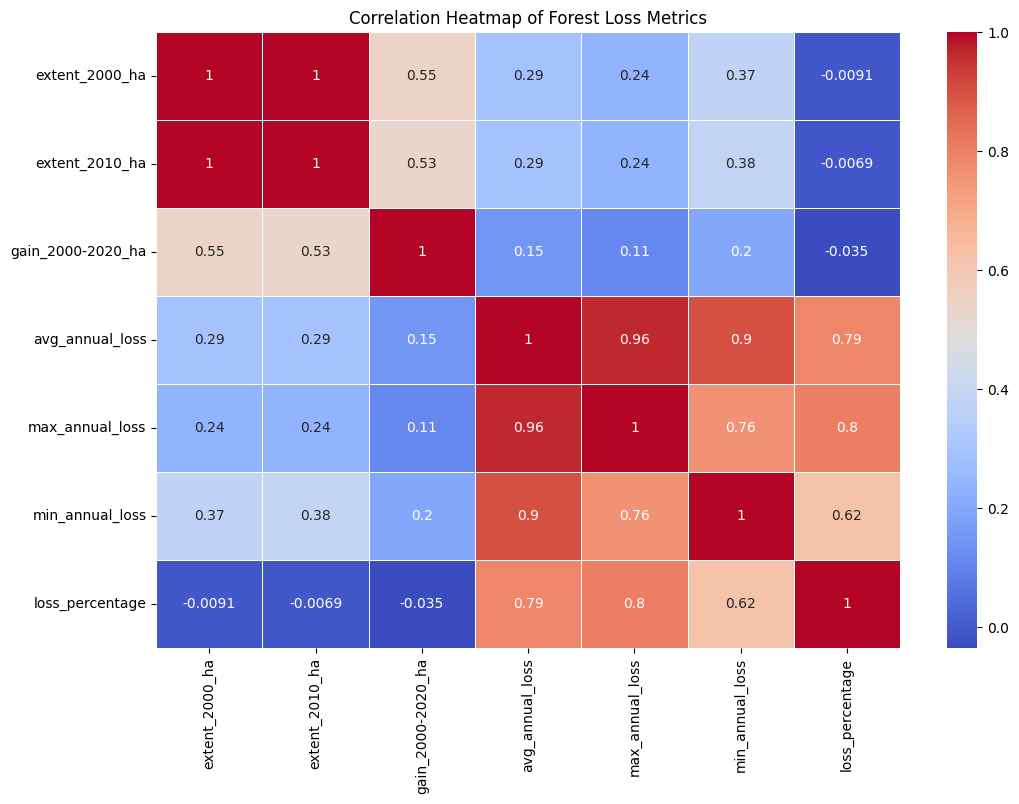

In [12]:

# Load dataset
file_path = r"C:\Users\rsmvs\OneDrive\Desktop\Climate Project\IND.xlsx"
subnational_tree_cover_loss_df = pd.read_excel(file_path, sheet_name="Subnational 1 tree cover loss")

# Extract relevant columns
years = [col for col in subnational_tree_cover_loss_df.columns if "tc_loss_ha_" in col]
subnational_tree_cover_loss_df["avg_annual_loss"] = subnational_tree_cover_loss_df[years].mean(axis=1)
subnational_tree_cover_loss_df["max_annual_loss"] = subnational_tree_cover_loss_df[years].max(axis=1)
subnational_tree_cover_loss_df["min_annual_loss"] = subnational_tree_cover_loss_df[years].min(axis=1)
subnational_tree_cover_loss_df["total_loss"] = subnational_tree_cover_loss_df[years].sum(axis=1)
subnational_tree_cover_loss_df["loss_percentage"] = (subnational_tree_cover_loss_df["total_loss"] / subnational_tree_cover_loss_df["extent_2000_ha"]) * 100

# Select required columns
statewise_summary = subnational_tree_cover_loss_df[["subnational1", "extent_2000_ha", "extent_2010_ha", 
                                                     "gain_2000-2020_ha", "avg_annual_loss", "max_annual_loss", 
                                                     "min_annual_loss", "loss_percentage"]]

# Aggregate data by state
statewise_summary = statewise_summary.groupby("subnational1").mean().reset_index()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(statewise_summary.drop(columns=["subnational1"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Forest Loss Metrics")
plt.show()

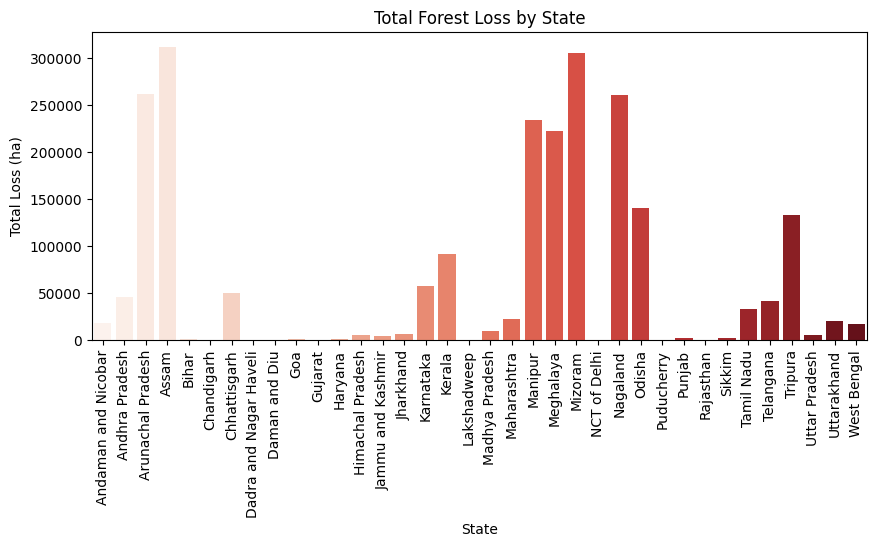

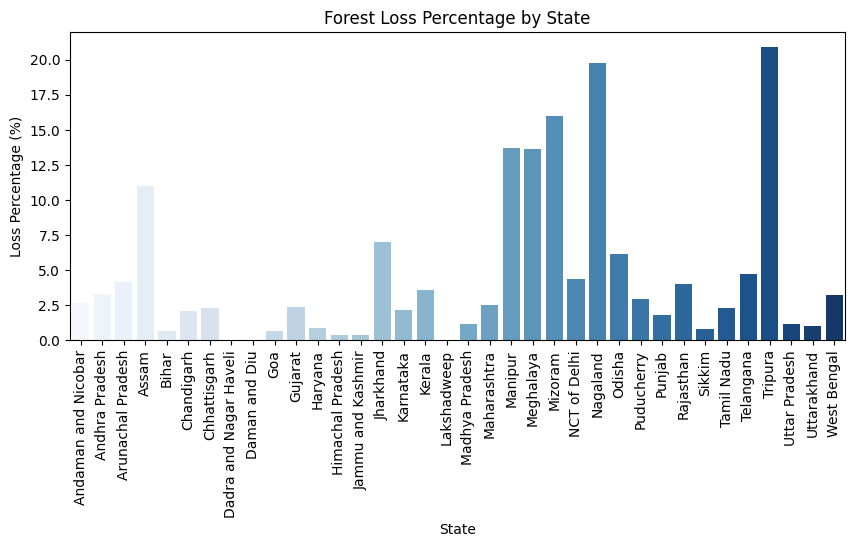

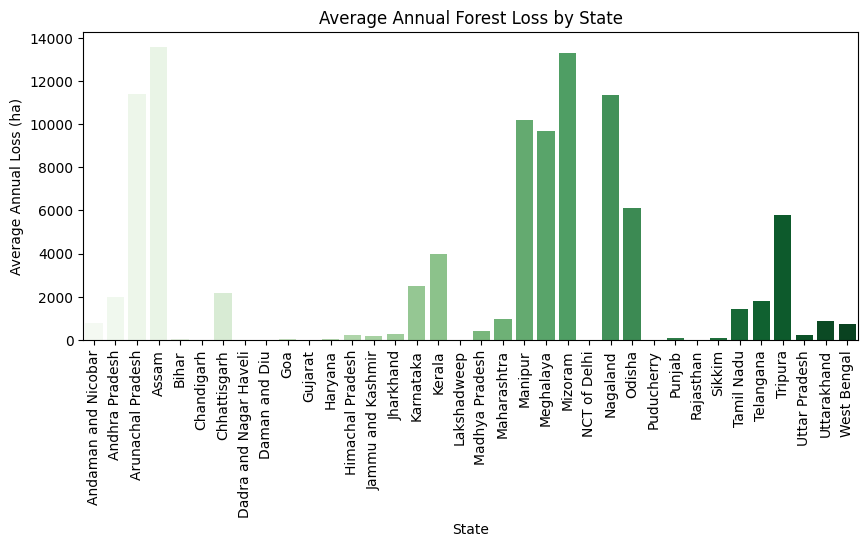

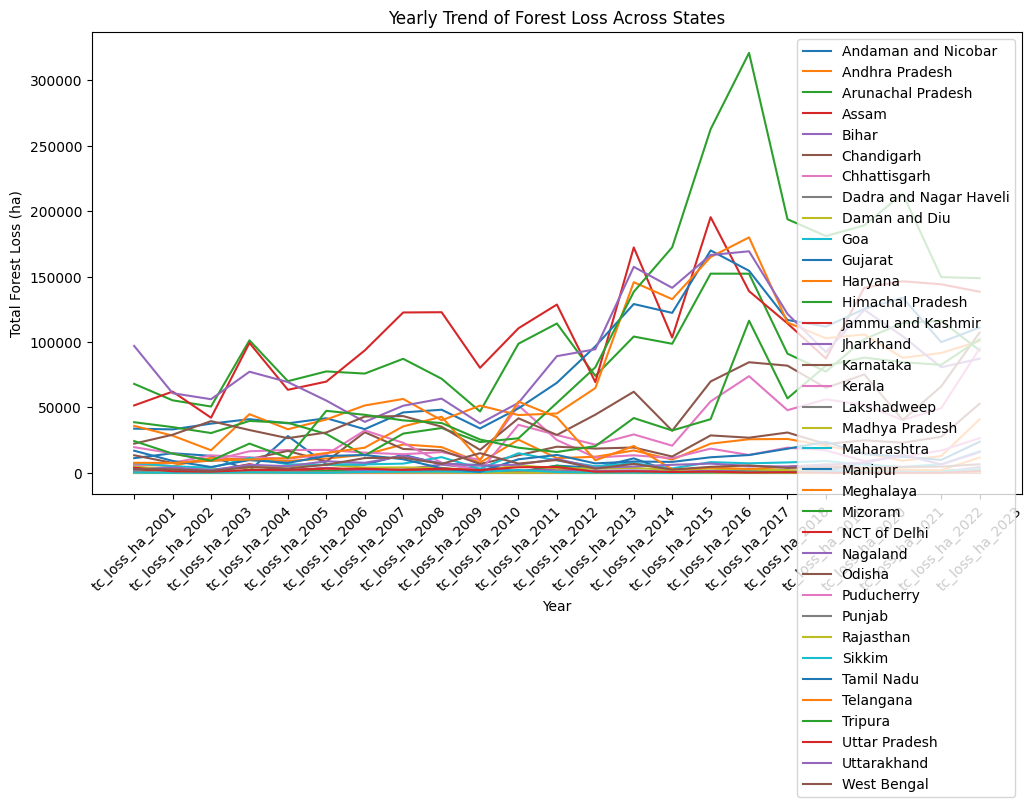

In [17]:
years = [col for col in subnational_tree_cover_loss_df.columns if "tc_loss_ha_" in col]
subnational_tree_cover_loss_df["avg_annual_loss"] = subnational_tree_cover_loss_df[years].mean(axis=1)
subnational_tree_cover_loss_df["total_loss"] = subnational_tree_cover_loss_df[years].sum(axis=1)
subnational_tree_cover_loss_df["loss_percentage"] = (subnational_tree_cover_loss_df["total_loss"] / subnational_tree_cover_loss_df["extent_2000_ha"]) * 100

# Select required columns
statewise_summary = subnational_tree_cover_loss_df[["subnational1", "extent_2000_ha", "extent_2010_ha", 
                                                     "avg_annual_loss", "total_loss", "loss_percentage"]]

# Aggregate data by state
statewise_summary = statewise_summary.groupby("subnational1").mean().reset_index()

# Plot total forest loss per state
plt.figure(figsize=(10, 4))
sns.barplot(x="subnational1", y="total_loss", hue="subnational1", data=statewise_summary, palette="Reds", legend=False)
plt.xticks(rotation=90)
plt.title("Total Forest Loss by State")
plt.xlabel("State")
plt.ylabel("Total Loss (ha)")
plt.show()

# Plot forest loss percentage per state
plt.figure(figsize=(10, 4))
sns.barplot(x="subnational1", y="loss_percentage", hue="subnational1", data=statewise_summary, palette="Blues", legend=False)
plt.xticks(rotation=90)
plt.title("Forest Loss Percentage by State")
plt.xlabel("State")
plt.ylabel("Loss Percentage (%)")
plt.show()

# Plot average annual forest loss per state
plt.figure(figsize=(10, 4))
sns.barplot(x="subnational1", y="avg_annual_loss", hue="subnational1", data=statewise_summary, palette="Greens", legend=False)
plt.xticks(rotation=90)
plt.title("Average Annual Forest Loss by State")
plt.xlabel("State")
plt.ylabel("Average Annual Loss (ha)")
plt.show()

# Line graph showing yearly trend of forest loss for all states
plt.figure(figsize=(12, 6))
for state in subnational_tree_cover_loss_df["subnational1"].unique():
    state_data = subnational_tree_cover_loss_df[subnational_tree_cover_loss_df["subnational1"] == state]
    plt.plot(years, state_data[years].sum(), label=state)

plt.xticks(rotation=45)
plt.title("Yearly Trend of Forest Loss Across States")
plt.xlabel("Year")
plt.ylabel("Total Forest Loss (ha)")
plt.legend()
plt.show()


Epoch 1/150


C:\Users\rsmvs\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.1152 - mae: 0.2173 - val_loss: 0.2083 - val_mae: 0.2805
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1168 - mae: 0.2195 - val_loss: 0.2044 - val_mae: 0.2815
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1199 - mae: 0.2249 - val_loss: 0.2004 - val_mae: 0.2834
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1058 - mae: 0.2192 - val_loss: 0.1955 - val_mae: 0.2858
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1086 - mae: 0.2242 - val_loss: 0.1898 - val_mae: 0.2888
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1010 - mae: 0.2247 - val_loss: 0.1845 - val_mae: 0.2897
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0976 - mae: 0.2201 - val_loss: 0.1777 - val_mae: 0.2886
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0966 - mae: 0.2204 - val_loss: 0.1678 - val_mae: 0.2869
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0868 - mae: 0.2094 - va

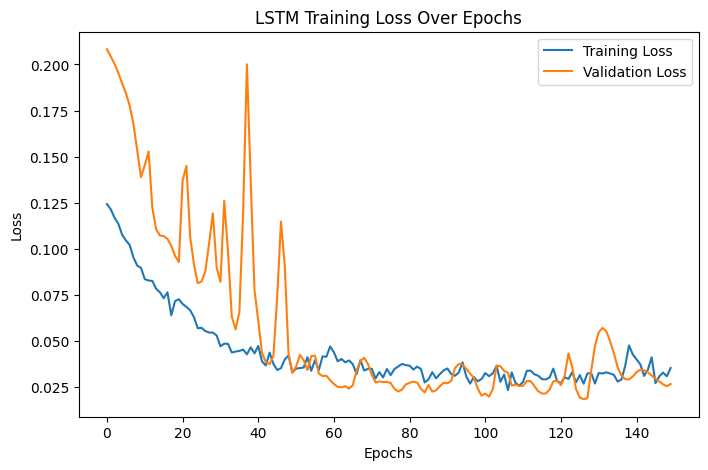

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Random Forest MSE: 0.0000
Random Forest R² Score: 1.0000
Random Forest MAE: 0.0000
Random Forest Accuracy: nan


C:\Users\rsmvs\AppData\Local\Temp\ipykernel_28496\2628278009.py:96: RuntimeWarning: invalid value encountered in scalar divide
  accuracy = 1 - (mae / np.mean(y_rf))


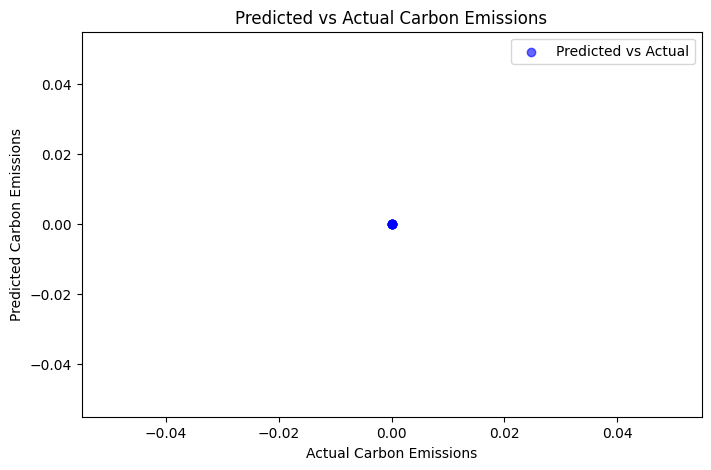

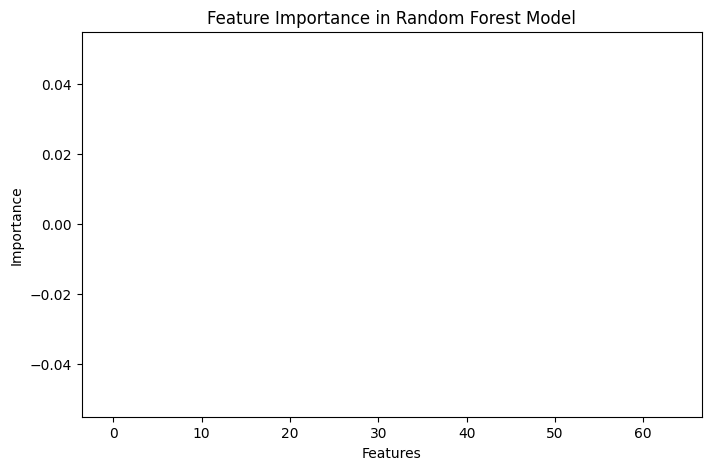

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
file_path = r"C:\Users\rsmvs\OneDrive\Desktop\Climate Project\IND.xlsx"
carbon_data_df = pd.read_excel(file_path, sheet_name="Country carbon data")
tree_loss_df = pd.read_excel(file_path, sheet_name="Country tree cover loss")

# Merge datasets on country
df = pd.merge(tree_loss_df, carbon_data_df, on="country")

# Extract yearly data
years = [col for col in df.columns if "tc_loss_ha_" in col]
carbon_years = [col for col in df.columns if "gfw_forest_carbon_gross_emissions_" in col]

# Prepare time-series data
df_yearly = df[["country"] + years + carbon_years].set_index("country").T

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_yearly)

# Create sequences for LSTM
sequence_length = 5  # Use past 5 years of data
X, y = [], []
for i in range(len(df_scaled) - sequence_length):
    X.append(df_scaled[i : i + sequence_length])
    y.append(df_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# Handle NaN values
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build Enhanced LSTM Model
model = Sequential([
    LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training Loss Over Epochs")
plt.legend()
plt.show()

# Predict future forest loss
y_pred_lstm = model.predict(X_test)

# Use LSTM outputs as new features for Random Forest
X_rf = y_pred_lstm  # Features
y_rf = y_test[:, 0]  # Target is first carbon emission column

# Handle NaN values in Random Forest inputs
X_rf = np.nan_to_num(X_rf)
y_rf = np.nan_to_num(y_rf)

# Train Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict carbon emissions
y_pred_rf = rf_model.predict(X_rf)

# Evaluate model performance
mse = mean_squared_error(y_rf, y_pred_rf)
r2 = r2_score(y_rf, y_pred_rf)
mae = np.mean(np.abs(y_rf - y_pred_rf))
accuracy = 1 - (mae / np.mean(y_rf))

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R² Score: {r2:.4f}")
print(f"Random Forest MAE: {mae:.4f}")
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Plot actual vs predicted emissions
plt.figure(figsize=(8, 5))
plt.scatter(y_rf, y_pred_rf, alpha=0.6, label="Predicted vs Actual", color='blue')
plt.plot([min(y_rf), max(y_rf)], [min(y_rf), max(y_rf)], color='red', linestyle='dashed')
plt.xlabel("Actual Carbon Emissions")
plt.ylabel("Predicted Carbon Emissions")
plt.title("Predicted vs Actual Carbon Emissions")
plt.legend()
plt.show()

# Feature importance from Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(range(len(feature_importances)), feature_importances, color='green')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()
